In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family = 'NanumBarunGothic')
plt.rc('xtick', labelsize = 20) # x축 라벨 크기
plt.rc('ytick', labelsize = 20) # y축 라벨 크기

# **1. 데이터 불러오기**

In [3]:
df = pd.read_csv("./datasets/preprocessing/final.csv",encoding ="euc-kr")
df = df.loc[df['행정구'] == '관악구'].reset_index(drop = True)
df.head(10)

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,관악구,보라매동,9,2,0,2,1,10,0,0,...,54.0,1035,1394,9065,6740,3395,3111,24740,1,0
1,관악구,청림동,3,0,0,1,1,3,0,0,...,57.0,1131,1132,4189,4732,1975,1925,15084,0,0
2,관악구,성현동,2,1,0,0,0,8,0,0,...,52.0,1715,2740,7277,9538,3998,3699,28967,0,0
3,관악구,행운동,4,5,0,1,1,14,0,1,...,54.0,970,1318,14112,7095,3259,2987,29741,0,0
4,관악구,낙성대동,21,4,0,6,2,11,0,0,...,54.0,573,828,10030,3689,1402,1416,17938,0,0
5,관악구,청룡동,7,5,0,1,3,15,0,1,...,52.0,1178,1634,19551,8073,3422,3160,37018,1,0
6,관악구,은천동,11,2,0,2,1,28,0,0,...,52.0,1795,2632,10407,9922,4430,4039,33225,1,0
7,관악구,중앙동,5,2,0,1,1,7,0,0,...,52.0,386,561,7940,3528,1668,1647,15730,0,0
8,관악구,인헌동,4,2,0,1,0,25,0,1,...,55.0,960,1431,11182,6893,3008,2725,26199,1,0
9,관악구,남현동,4,1,0,1,2,5,0,0,...,58.0,815,781,7696,4758,2288,1899,18237,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             21 non-null     object 
 1   행정동             21 non-null     object 
 2   갈비/삼겹살          21 non-null     int64  
 3   곱창/양구이전문        21 non-null     int64  
 4   기사식당            21 non-null     int64  
 5   기타고기요리          21 non-null     int64  
 6   냉면집             21 non-null     int64  
 7   닭/오리요리          21 non-null     int64  
 8   돌솥/비빕밥전문점       21 non-null     int64  
 9   두부요리전문          21 non-null     int64  
 10  버섯전문점           21 non-null     int64  
 11  별식/퓨전요리         21 non-null     int64  
 12  보리밥전문           21 non-null     int64  
 13  부대찌개/섞어찌개       21 non-null     int64  
 14  부페              21 non-null     int64  
 15  분식              21 non-null     int64  
 16  설렁탕집            21 non-null     int64  
 17  순두부전문           21 non-null     int64

- 총 72개의 컬럼
- 강서구의 경우 21개의 행정동 -> 각 컬럼마다 **21개**의 데이터가 존재해야 한다.
- 결측치 존재 x

# **2. 업종 수와 각 변수들 간의 상관관계 파악하기**

- 상관계수는 **-1부터 1** 사이로 구성된다.
- 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있음
- 상관계수의 절댓값이 **0.3 이상**인 업종들 위주로 파악

**✔ df.corr() 적용 시 NaN**
- 피어쓴 상관계수 계산 식은 아래와 같음
- 따라서, 모든 행의 데이터 값이 동일한 경우 표준편차가 0이 되어 분모가 0으로 계산된다. 
    - 이로 인해, 원본 데이터에 결측치가 없어도 NaN이 발생될 수 있다.

![corr](pearson.jpg)

In [5]:
empty = pd.DataFrame(columns = {'업종','변수','상관계수'}) 
empty # 가나다 순으로 컬럼명이 붙는다.

,업종,상관계수,변수


In [6]:
empty.columns = ['업종','변수','상관계수']
empty

,업종,변수,상관계수


In [7]:
### 33개의 업종에 대해 각 업종과의 상관계수가 0.3 이상인 변수만 추출하는 함수

def selection(df):
    result_df = pd.DataFrame(columns = {'업종','변수','상관계수'}) # 빈 DataFrame
    result_df.columns = ['업종','변수','상관계수'] # 컬럼 순서 변경
    
    sectors = df.columns # 전체 33개의 업종
    
    for i in range(len(sectors)):
        sector = sectors[i] # 각 업종
        variables = list(df.loc[df[sector] >= 0.3, sector].index) + list(df.loc[df[sector] <= -0.3, sector].index) # 상관계수의 절댓값이 0.3 이상인 변수들
        corrs = list(df.loc[df[sector] >= 0.3, sector].values) + list(df.loc[df[sector] <= -0.3, sector].values) # 각각의 상관계수
        
        for j in range(len(variables)):
            result_df.loc[len(result_df)] = [sector,variables[j],corrs[j]] # 행 추가
    
    return result_df

## **2-1. 관악구**
- 각각의 데이터셋 별로 변수들의 영향력 확인

### **a) 생활인구**

In [8]:
### 필요한 데이터 추출

df_life = df.iloc[:,:49]
df_life.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,60대 생활인구_주말,70대 이상 생활인구_주말
0,관악구,보라매동,9,2,0,2,1,10,0,0,...,119012.90000,39819.33838,46211.57971,401386.3041,18981.51493,24263.91208,155614.22110,116602.31960,40277.00555,45647.32909
1,관악구,청림동,3,0,0,1,1,3,0,0,...,79500.23289,28341.87823,33422.98305,280417.5459,28473.62289,23711.78516,78642.61694,87220.32388,28954.86531,33414.33228
2,관악구,성현동,2,1,0,0,0,8,0,0,...,157743.16130,55365.14155,66408.64098,553096.4578,46669.39640,60044.49665,139714.97760,180174.29380,58019.44708,68473.84534
3,관악구,행운동,4,5,0,1,1,14,0,1,...,137473.11400,49311.76472,54243.18371,572129.3294,27579.52809,32580.60103,263344.44430,143789.64300,49907.56649,54927.54640
4,관악구,낙성대동,21,4,0,6,2,11,0,0,...,121099.57600,34780.85518,36275.62160,606333.1552,23404.46044,53980.61349,331272.33810,123768.99190,36749.31115,37157.44263


In [9]:
### 상관계수 파악

life_corr = df_life.corr().iloc[33:,:33]
life_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총생활인구수_평일,0.388473,0.530569,-0.022868,0.212392,0.355806,0.642534,NaN,0.242772,NaN,0.749175,...,0.480933,0.658931,0.012043,0.624568,0.395937,0.621745,0.757393,0.357503,0.465939,0.165944
10대 미만 생활인구_평일,-0.369794,-0.196000,-0.203261,-0.270422,0.119934,0.252656,NaN,0.212924,NaN,-0.132375,...,-0.000652,-0.143053,0.326617,-0.144666,0.026689,0.007291,-0.219724,-0.170321,-0.380552,0.496511
10대 생활인구_평일,0.038779,-0.006475,-0.197282,0.055762,0.284739,0.438708,NaN,0.301321,NaN,0.414216,...,0.341387,0.224589,0.212044,0.268409,0.221981,0.261126,0.355277,0.227383,-0.095324,0.107704
20~30대 생활인구_평일,0.538446,0.617454,0.063206,0.362767,0.409552,0.554849,NaN,0.114515,NaN,0.763762,...,0.483071,0.704986,-0.131890,0.761979,0.369587,0.642157,0.853986,0.468898,0.597711,-0.018126
40~50대 생활인구_평일,0.232947,0.452610,-0.088510,0.045090,0.140051,0.587693,NaN,0.222257,NaN,0.628510,...,0.378721,0.641038,0.089034,0.367874,0.297163,0.495662,0.563788,0.241854,0.404007,0.274120
60대 생활인구_평일,0.047183,0.270172,-0.069376,-0.103062,0.131783,0.485443,NaN,0.402717,NaN,0.468466,...,0.281536,0.312144,0.191263,0.166550,0.324175,0.380319,0.312445,-0.018287,0.155482,0.438742
70대 이상 생활인구_평일,-0.061236,0.077348,-0.076756,-0.191549,0.091181,0.470419,NaN,0.467460,NaN,0.332245,...,0.211722,0.053182,0.250722,0.067954,0.384259,0.288139,0.191761,-0.201615,-0.044143,0.397362
총생활인구수_주말,0.445994,0.607677,0.028743,0.289206,0.381831,0.628794,NaN,0.299373,NaN,0.721385,...,0.452862,0.548900,0.055695,0.650831,0.436896,0.531097,0.699514,0.274982,0.455638,0.203080
10대 미만 생활인구_주말,-0.231705,-0.145641,-0.127987,-0.148160,0.167487,0.215504,NaN,0.083390,NaN,-0.104029,...,-0.054019,-0.117749,0.214516,-0.143754,-0.009702,-0.058882,-0.192381,-0.078769,-0.250834,0.614208
10대 생활인구_주말,0.111385,0.099518,-0.129805,0.163430,0.279496,0.384449,NaN,0.218851,NaN,0.327672,...,0.262248,0.138311,0.286187,0.234226,0.201768,0.055516,0.219960,0.144383,-0.038517,0.258678


In [10]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_life = selection(life_corr)
result_life.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20~30대 생활인구_주말,0.616327
1,갈비/삼겹살,20~30대 생활인구_평일,0.538446
2,갈비/삼겹살,총생활인구수_주말,0.445994
3,갈비/삼겹살,총생활인구수_평일,0.388473
4,갈비/삼겹살,10대 미만 생활인구_평일,-0.369794
...,...,...,...
167,황태전문,60대 생활인구_주말,0.440243
168,황태전문,60대 생활인구_평일,0.438742
169,황태전문,70대 이상 생활인구_평일,0.397362
170,황태전문,70대 이상 생활인구_주말,0.374694


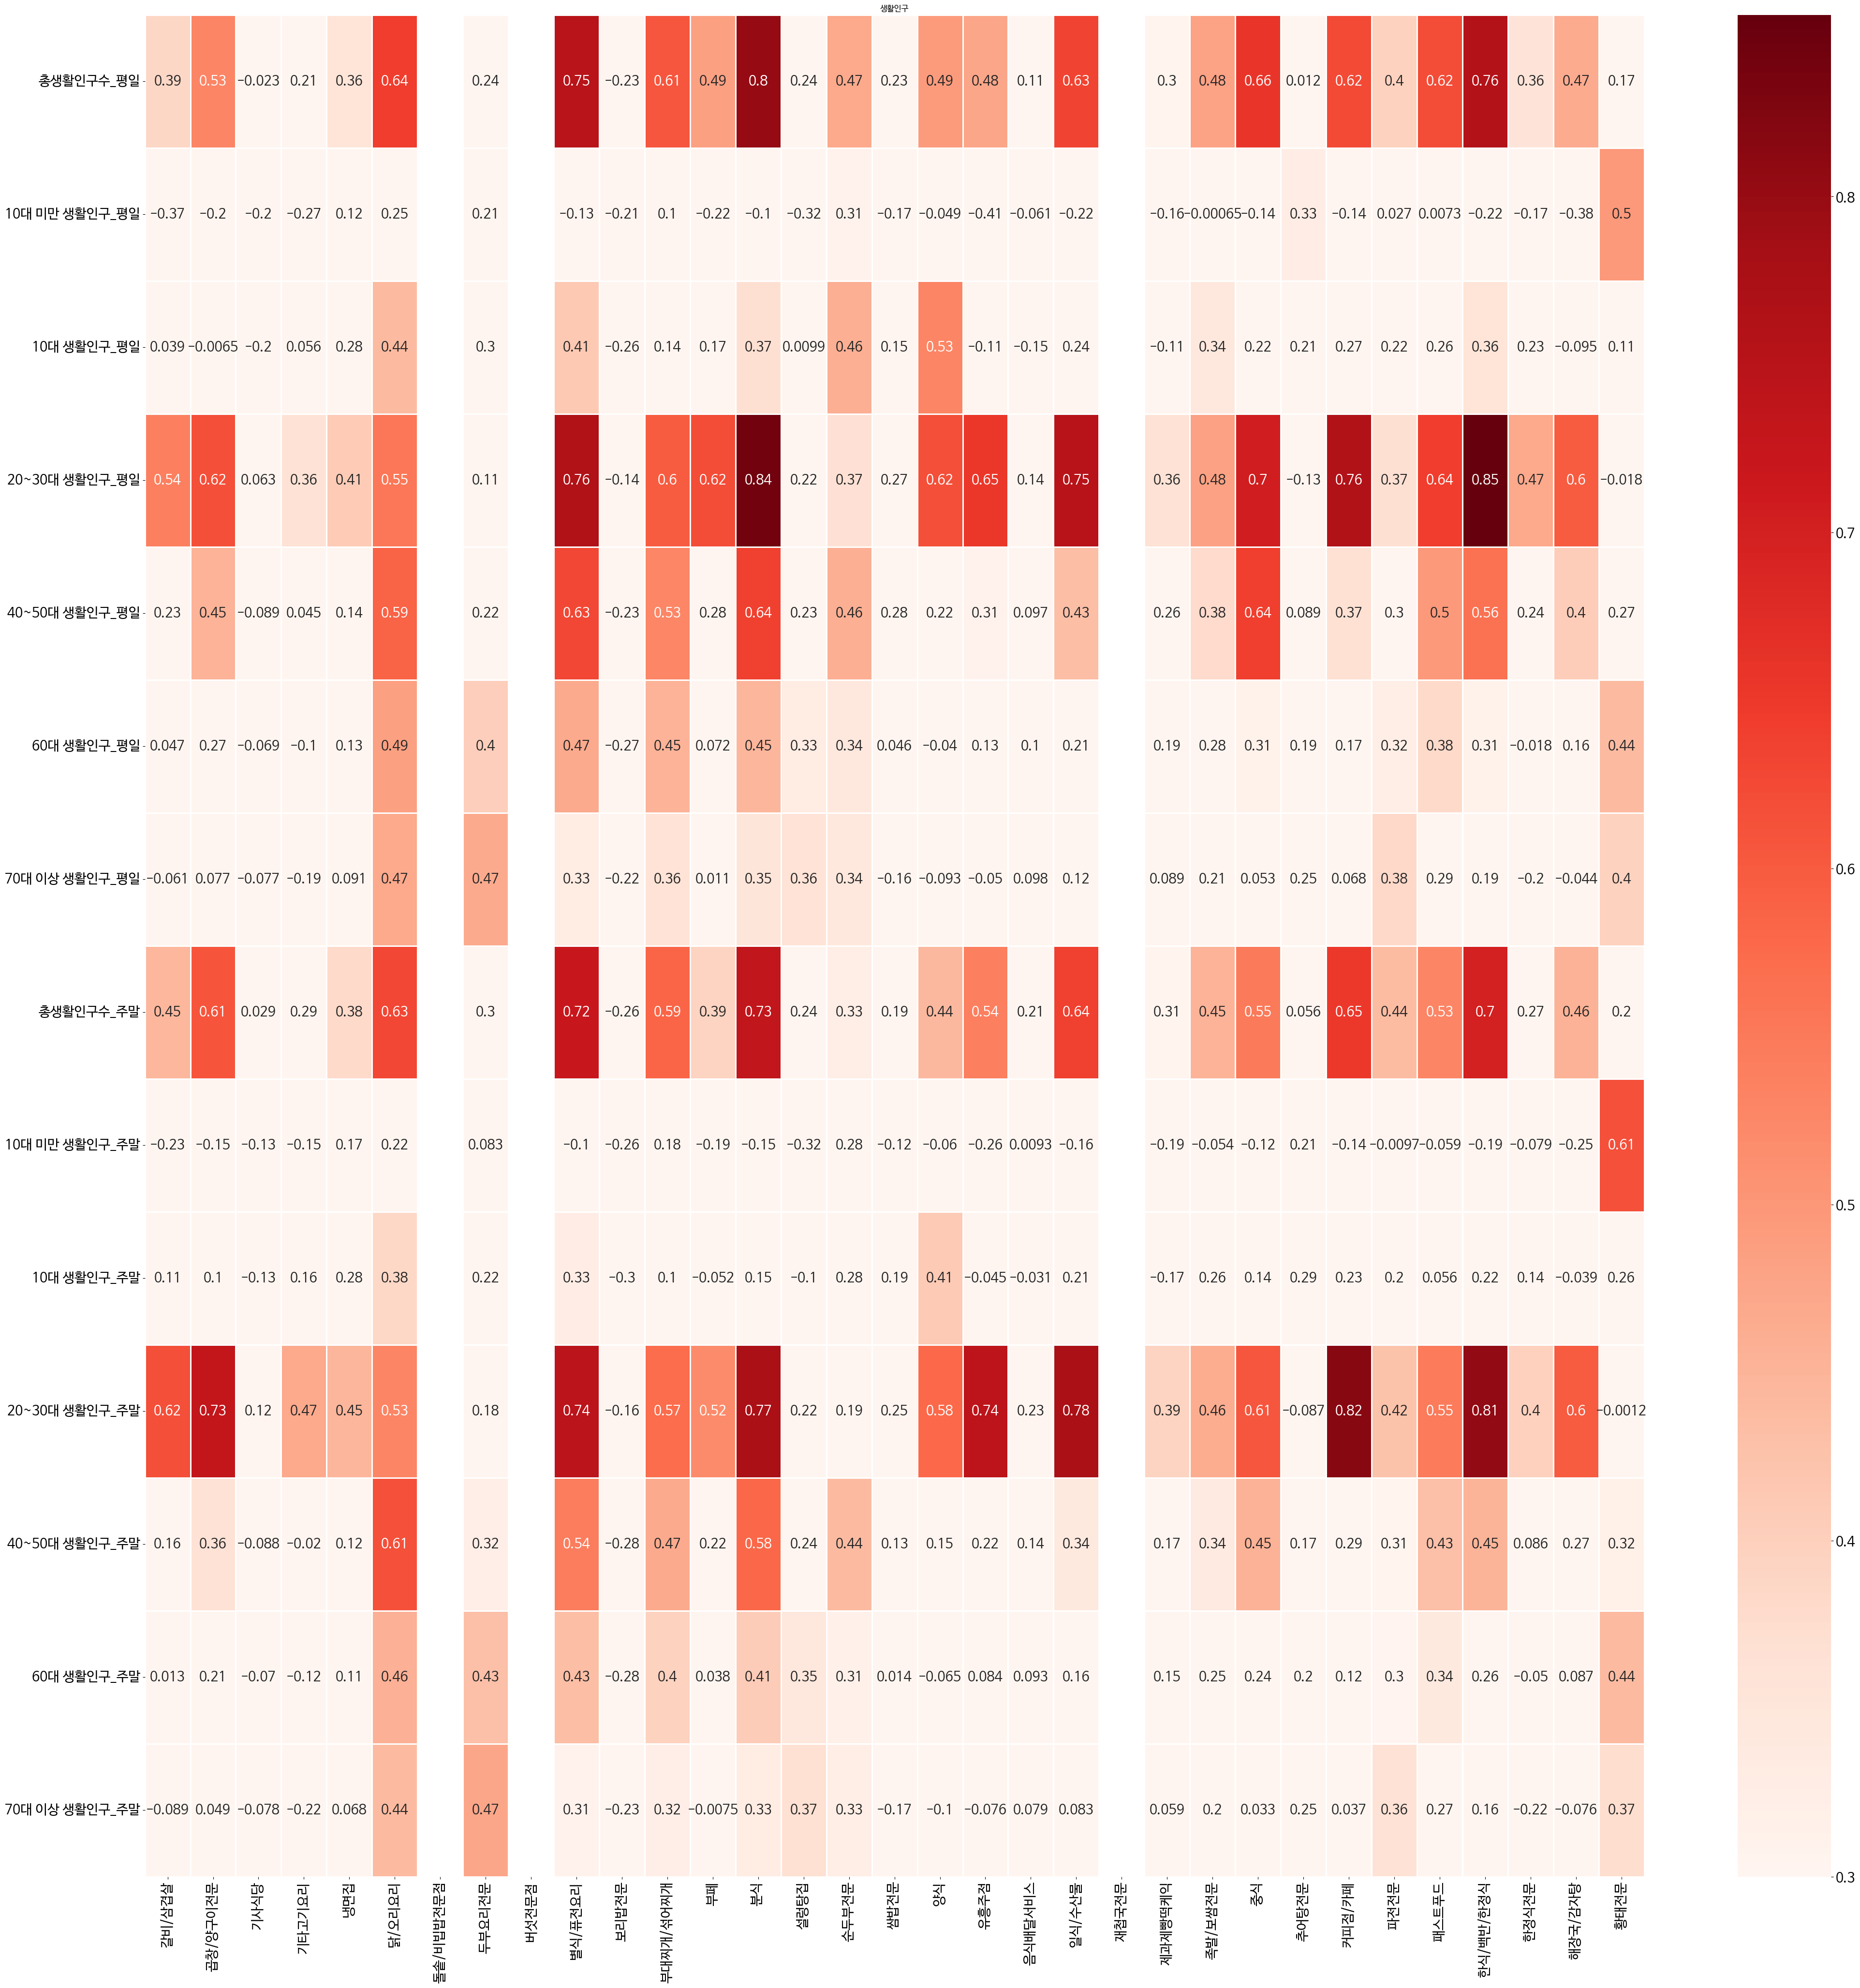

In [11]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,50))
sns.heatmap(life_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("생활인구")
plt.show()

In [12]:
result_life.groupby('업종')['변수'].count()

업종
갈비/삼겹살        5
곱창/양구이전문      6
기타고기요리        2
냉면집           4
닭/오리요리       12
두부요리전문        6
별식/퓨전요리      12
부대찌개/섞어찌개    10
부페            4
분식           11
설렁탕집          6
순두부전문        11
양식            6
유흥주점          6
일식/수산물        6
제과제빵떡케익       4
족발/보쌈전문       7
중식            7
추어탕전문         1
커피점/카페        5
파전전문          9
패스트푸드         8
한식/백반/한정식     8
한정식전문         3
해장국/감자탕       6
황태전문          7
Name: 변수, dtype: int64

- 생활인구 데이터의 전체 변수 개수: **14개**
- 생활인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 생활인구 데이터의 대부분의 변수들은 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교해서 **관악구**에서의 각 변수들과 업종별 업소 수의 상관관계가 약하다. 

### **b) 대학정보**

In [13]:
### 필요한 데이터 추출

df_univ = pd.concat([df.iloc[:,0:35],df.iloc[:,49:52]],axis = 1)
df_univ.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,대학교(전체),일반대학,온라인대학
0,관악구,보라매동,9,2,0,2,1,10,0,0,...,50,1,12,66,1,2,0,0,0,0
1,관악구,청림동,3,0,0,1,1,3,0,0,...,8,0,3,20,0,0,0,0,0,0
2,관악구,성현동,2,1,0,0,0,8,0,0,...,15,0,3,22,0,1,0,0,0,0
3,관악구,행운동,4,5,0,1,1,14,0,1,...,59,0,15,45,0,0,0,0,0,0
4,관악구,낙성대동,21,4,0,6,2,11,0,0,...,70,0,7,87,2,3,0,1,1,0


In [14]:
### 상관계수 파악

univ_corr = df_univ.corr().iloc[33:,:33]
univ_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
대학교(전체),0.546034,0.20381,-0.05,0.742872,0.330289,-0.03596,NaN,-0.125,NaN,0.43312,...,0.383576,0.25254,-0.148047,0.424669,-0.068465,-0.170502,0.374069,0.661438,0.131559,-0.072548
일반대학,0.546034,0.20381,-0.05,0.742872,0.330289,-0.03596,NaN,-0.125,NaN,0.43312,...,0.383576,0.25254,-0.148047,0.424669,-0.068465,-0.170502,0.374069,0.661438,0.131559,-0.072548
온라인대학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_univ = selection(univ_corr)
result_univ.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,대학교(전체),0.546034
1,갈비/삼겹살,일반대학,0.546034
2,기타고기요리,대학교(전체),0.742872
3,기타고기요리,일반대학,0.742872
4,냉면집,대학교(전체),0.330289
5,냉면집,일반대학,0.330289
6,별식/퓨전요리,대학교(전체),0.433120
7,별식/퓨전요리,일반대학,0.433120
8,쌈밥전문,대학교(전체),0.689202
9,쌈밥전문,일반대학,0.689202


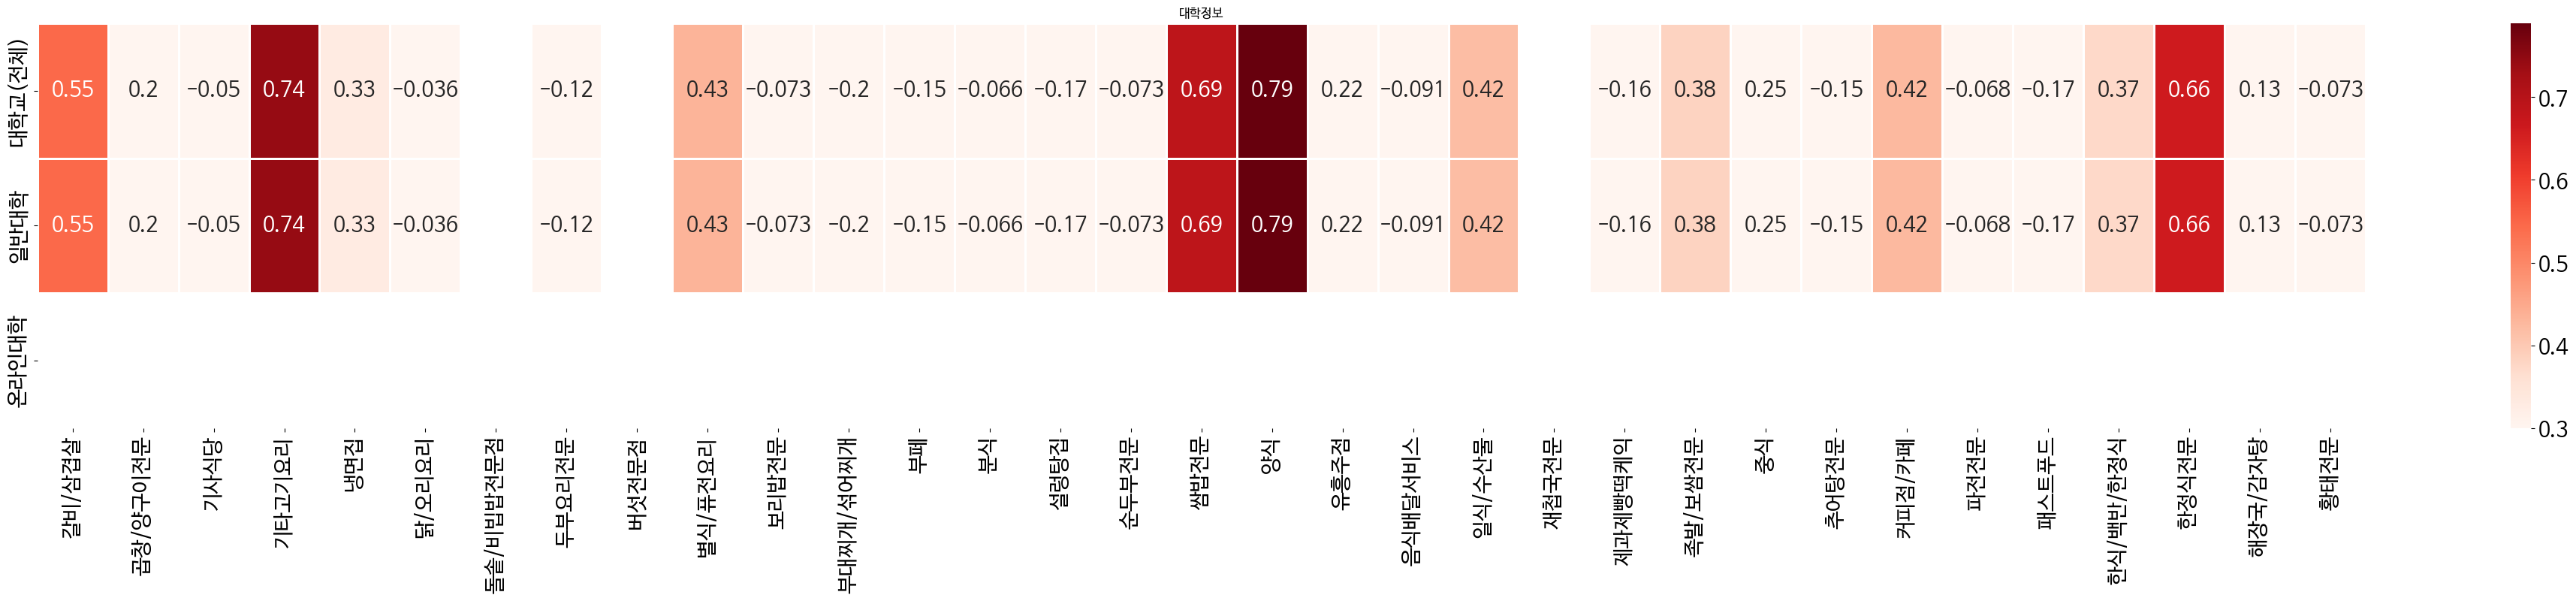

In [16]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(univ_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("대학정보")
plt.show()

In [17]:
result_univ.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
기타고기요리       2
냉면집          2
별식/퓨전요리      2
쌈밥전문         2
양식           2
일식/수산물       2
족발/보쌈전문      2
커피점/카페       2
한식/백반/한정식    2
한정식전문        2
Name: 변수, dtype: int64

- 대학정보 데이터의 전체 변수 개수: **3개**
- 대학정보 데이터의 경우 변수들과의 상관계수가 0.3 이상인 업종이 상당수 존재한다.
    - 하지만, 관악구에 존재하는 대학의 수는 **1개**이기 때문에, 대학 수가 업종들의 업소 수와 강한 상관관계가 있다고 단정짓기는 힘들다.

### **c) 초중고학교정보**

In [18]:
### 필요한 데이터 추출

df_school = pd.concat([df.iloc[:,0:35],df.iloc[:,52:56]],axis = 1)
df_school.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,초중고(전체),초등학교,중학교,고등학교
0,관악구,보라매동,9,2,0,2,1,10,0,0,...,1,12,66,1,2,0,3,1,1,1
1,관악구,청림동,3,0,0,1,1,3,0,0,...,0,3,20,0,0,0,0,0,0,0
2,관악구,성현동,2,1,0,0,0,8,0,0,...,0,3,22,0,1,0,4,2,1,1
3,관악구,행운동,4,5,0,1,1,14,0,1,...,0,15,45,0,0,0,5,2,2,1
4,관악구,낙성대동,21,4,0,6,2,11,0,0,...,0,7,87,2,3,0,1,1,0,0


In [19]:
### 상관계수 파악

school_corr = df_school.corr().iloc[33:,:33]
school_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
초중고(전체),-0.356876,-0.019415,-0.161941,-0.385995,0.216310,0.184978,NaN,0.695396,NaN,0.199050,...,0.084373,0.010784,0.446004,0.105665,0.508715,0.370443,0.061753,-0.239432,-0.231846,-0.162405
초등학교,-0.303670,-0.011079,-0.358780,-0.323064,0.201991,-0.152474,NaN,0.472938,NaN,0.050684,...,0.172877,-0.056807,0.458731,-0.028256,0.290302,0.004278,-0.123237,-0.172590,-0.157336,-0.023662
중학교,-0.422046,-0.045855,0.061360,-0.370186,0.020267,0.141216,NaN,0.668825,NaN,0.030837,...,-0.111262,-0.040610,0.372450,0.071294,0.319279,0.378243,-0.089962,-0.324687,-0.387478,-0.284898
고등학교,-0.212861,0.003299,-0.165119,-0.301735,0.304765,0.356257,NaN,0.607054,NaN,0.351319,...,0.157153,0.087966,0.341515,0.175879,0.611794,0.453507,0.270528,-0.128489,-0.072409,-0.091604


In [20]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_school = selection(school_corr)
result_school.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,초등학교,-0.303670
1,갈비/삼겹살,초중고(전체),-0.356876
2,갈비/삼겹살,중학교,-0.422046
3,기사식당,초등학교,-0.358780
4,기타고기요리,고등학교,-0.301735
5,기타고기요리,초등학교,-0.323064
6,기타고기요리,중학교,-0.370186
7,기타고기요리,초중고(전체),-0.385995
8,냉면집,고등학교,0.304765
9,닭/오리요리,고등학교,0.356257


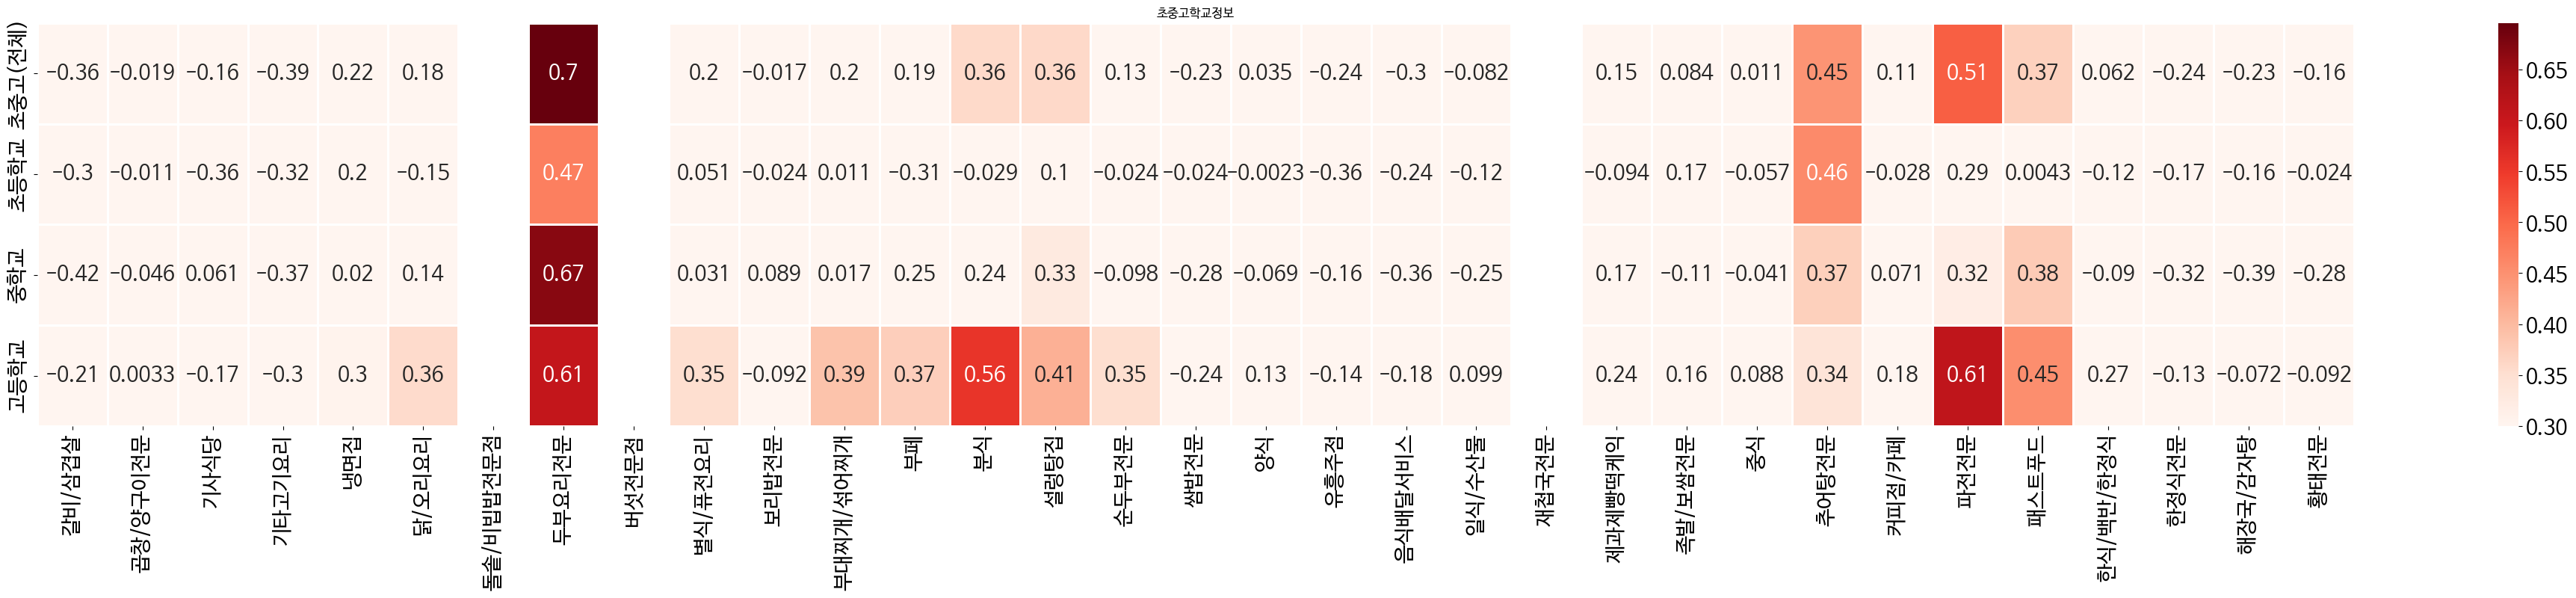

In [21]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(school_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("초중고학교정보")
plt.show()

In [22]:
result_school.groupby('업종')['변수'].count()

업종
갈비/삼겹살       3
기사식당         1
기타고기요리       4
냉면집          1
닭/오리요리       1
두부요리전문       4
별식/퓨전요리      1
부대찌개/섞어찌개    1
부페           2
분식           2
설렁탕집         3
순두부전문        1
유흥주점         1
음식배달서비스      1
추어탕전문        4
파전전문         3
패스트푸드        3
한정식전문        1
해장국/감자탕      1
Name: 변수, dtype: int64

- 초중고학교정보 데이터의 전체 변수 개수: **4개**
- 초중고학교정보 데이터의 경우 상당수의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 서울시 전체와 비교하였을 때 **관악구**에서 초중고학교정보 데이터는 각 업종의 업소 수와 상당히 뚜렷한 상관관계가 있다고 할 수 있다.

### **d) 소득정보**

In [23]:
### 필요한 데이터 추출

df_income = pd.concat([df.iloc[:,0:35],df.iloc[:,56:60]],axis = 1)
df_income.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,총인구수,총가구수,가구당인구수,평균소득금액
0,관악구,보라매동,9,2,0,2,1,10,0,0,...,1,12,66,1,2,0,24550,11887,2.07,4913.29
1,관악구,청림동,3,0,0,1,1,3,0,0,...,0,3,20,0,0,0,15090,5991,2.52,4913.29
2,관악구,성현동,2,1,0,0,0,8,0,0,...,0,3,22,0,1,0,29228,11633,2.51,4913.29
3,관악구,행운동,4,5,0,1,1,14,0,1,...,0,15,45,0,0,0,29334,16772,1.75,4913.29
4,관악구,낙성대동,21,4,0,6,2,11,0,0,...,0,7,87,2,3,0,21560,10219,2.11,4913.29


In [24]:
### 상관계수 파악

income_corr = df_income.corr().iloc[33:,:33]
income_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총인구수,-0.002738,0.183677,-0.036876,-0.121638,0.172095,0.580605,NaN,0.495438,NaN,0.287739,...,0.326072,0.093407,0.413040,0.357162,0.439853,0.427738,0.268959,-0.244143,-0.065965,0.107844
총가구수,0.264778,0.499794,0.067028,0.044634,0.299569,0.634770,NaN,0.413754,NaN,0.469301,...,0.398883,0.338066,0.183631,0.662641,0.521837,0.639125,0.558276,-0.089583,0.279559,-0.037179
가구당인구수,-0.469044,-0.587952,-0.188381,-0.261426,-0.159210,-0.377301,NaN,0.004432,NaN,-0.453424,...,-0.299234,-0.505651,0.158312,-0.654753,-0.185118,-0.584543,-0.645535,-0.209415,-0.591879,0.136666
평균소득금액,0.043641,-0.078859,-0.054974,-0.216365,0.119544,-0.110432,NaN,-0.161737,NaN,-0.068876,...,0.309840,0.114568,-0.192757,0.034997,-0.097461,0.008309,0.007235,-0.055869,-0.021739,0.115683


In [25]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_income = selection(income_corr)
result_income.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,가구당인구수,-0.469044
1,곱창/양구이전문,총가구수,0.499794
2,곱창/양구이전문,가구당인구수,-0.587952
3,닭/오리요리,총가구수,0.634770
4,닭/오리요리,총인구수,0.580605
5,닭/오리요리,가구당인구수,-0.377301
6,두부요리전문,총인구수,0.495438
7,두부요리전문,총가구수,0.413754
8,별식/퓨전요리,총가구수,0.469301
9,별식/퓨전요리,가구당인구수,-0.453424


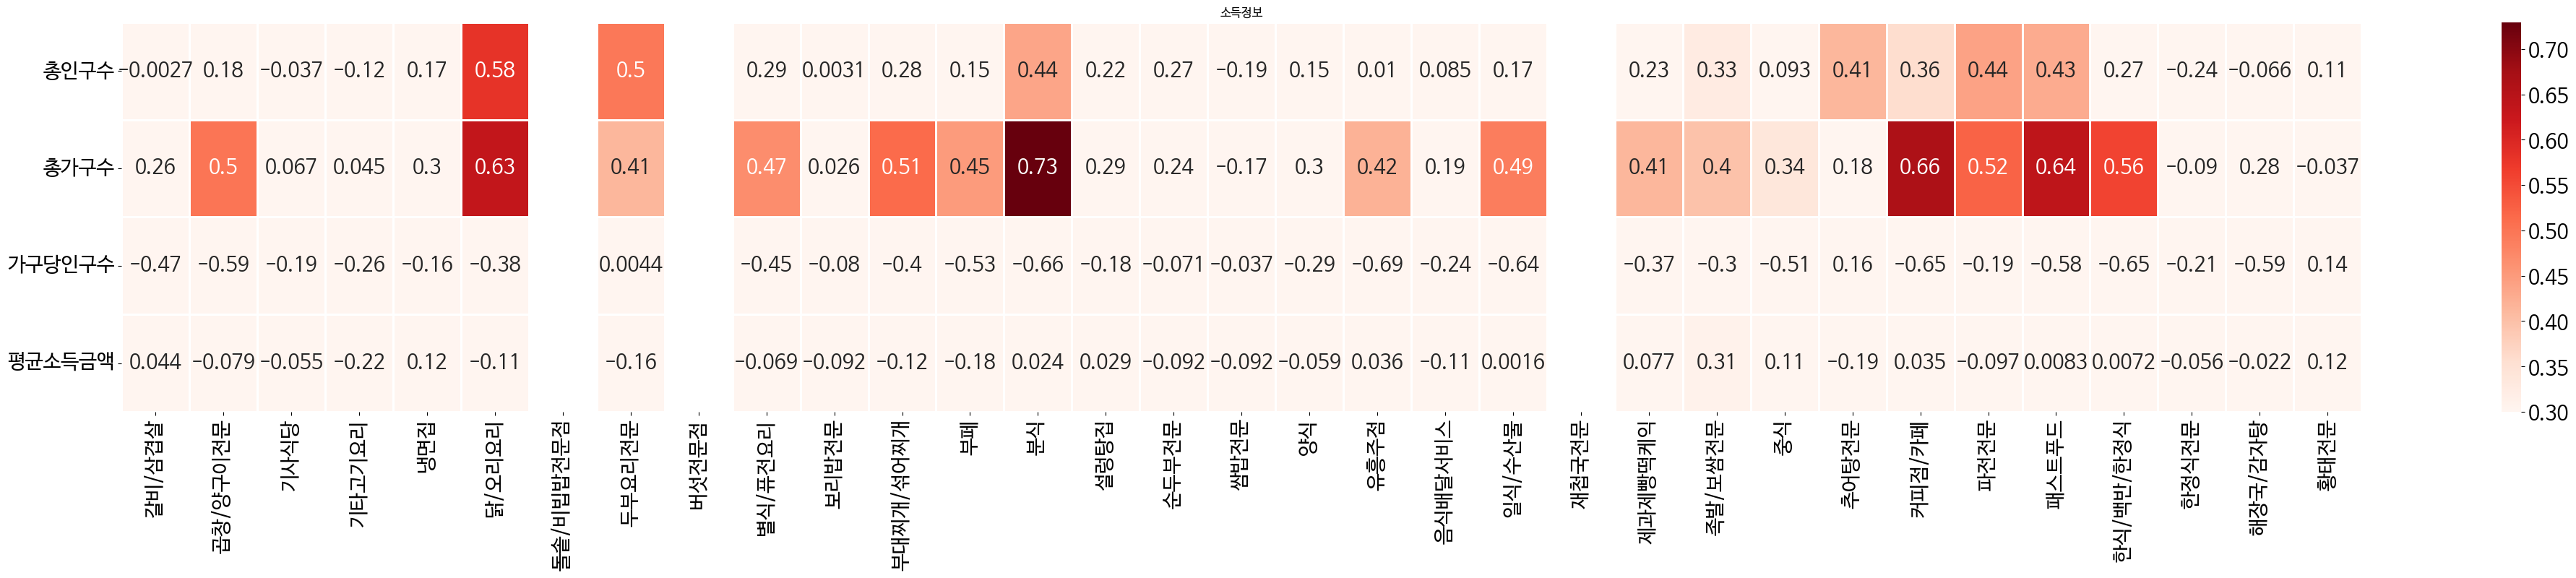

In [26]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(income_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("소득정보")
plt.show()

In [27]:
result_income.groupby('업종')['변수'].count()

업종
갈비/삼겹살       1
곱창/양구이전문     2
닭/오리요리       3
두부요리전문       2
별식/퓨전요리      2
부대찌개/섞어찌개    2
부페           2
분식           3
유흥주점         2
일식/수산물       2
제과제빵떡케익      2
족발/보쌈전문      3
중식           2
추어탕전문        1
커피점/카페       3
파전전문         2
패스트푸드        3
한식/백반/한정식    2
해장국/감자탕      1
Name: 변수, dtype: int64

- 소득정보 데이터의 전체 변수 개수: **4개**
- 소득정보 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 소득정보 데이터의 경우 대부분의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **관악구**에서 소득정보 데이터는 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **e) 상권변화지표**

In [28]:
### 필요한 데이터 추출

df_change = pd.concat([df.iloc[:,0:35],df.iloc[:,60:63]],axis = 1)
df_change.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,상권변화지표,운영점포영업개월,폐업점포영업개월
0,관악구,보라매동,9,2,0,2,1,10,0,0,...,50,1,12,66,1,2,0,LL,114.0,54.0
1,관악구,청림동,3,0,0,1,1,3,0,0,...,8,0,3,20,0,0,0,LH,102.0,57.0
2,관악구,성현동,2,1,0,0,0,8,0,0,...,15,0,3,22,0,1,0,LL,109.0,52.0
3,관악구,행운동,4,5,0,1,1,14,0,1,...,59,0,15,45,0,0,0,HL,122.0,54.0
4,관악구,낙성대동,21,4,0,6,2,11,0,0,...,70,0,7,87,2,3,0,LL,101.0,54.0


In [29]:
### 상관계수 파악
# 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음

change_corr = df_change.corr().iloc[33:,:33]
change_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
운영점포영업개월,-0.103576,0.108099,0.039512,-0.176452,-0.365942,0.109060,NaN,0.446382,NaN,0.151540,...,-0.034110,0.099877,0.100393,-0.134201,-0.038019,0.264155,0.035087,-0.158222,-0.061348,-0.007747
폐업점포영업개월,-0.325468,-0.576498,0.157660,-0.150316,-0.219525,-0.335718,NaN,0.296772,NaN,-0.202373,...,-0.421705,-0.487262,-0.254005,-0.509790,-0.169321,-0.228674,-0.459554,-0.196296,-0.604623,0.040369


In [30]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_change = selection(change_corr)
result_change.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,폐업점포영업개월,-0.325468
1,곱창/양구이전문,폐업점포영업개월,-0.576498
2,냉면집,운영점포영업개월,-0.365942
3,닭/오리요리,폐업점포영업개월,-0.335718
4,두부요리전문,운영점포영업개월,0.446382
5,분식,폐업점포영업개월,-0.414391
6,설렁탕집,운영점포영업개월,0.478166
7,설렁탕집,폐업점포영업개월,0.406371
8,양식,폐업점포영업개월,-0.336891
9,양식,운영점포영업개월,-0.363306


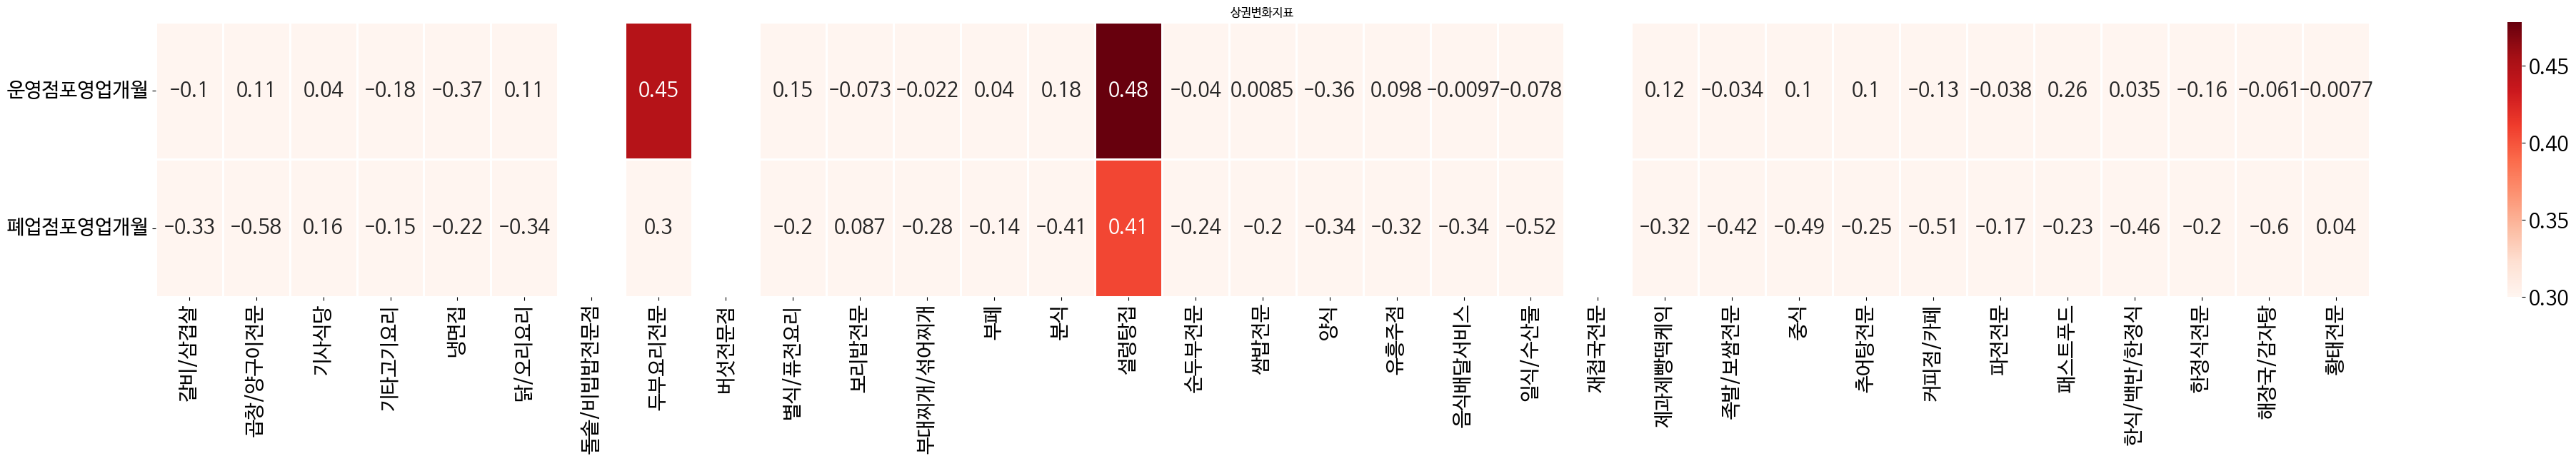

In [31]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(change_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("상권변화지표")
plt.show()

In [32]:
result_change.groupby('업종')['변수'].count()

업종
갈비/삼겹살       1
곱창/양구이전문     1
냉면집          1
닭/오리요리       1
두부요리전문       1
분식           1
설렁탕집         2
양식           2
유흥주점         1
음식배달서비스      1
일식/수산물       1
제과제빵떡케익      1
족발/보쌈전문      1
중식           1
커피점/카페       1
한식/백반/한정식    1
해장국/감자탕      1
Name: 변수, dtype: int64

- 상권변화지표 데이터의 전체 변수 개수: **3개**  
(단, 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음)  
- 상권변화지표 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상이다.  
- 서울시 전체와 다르게 **관악구**에서는 상권변화지표 데이터는 각 업종의 업소 수와 강한 상관관계가 있다고 할 수 있다.

### **f) 주민등록인구**

In [33]:
### 필요한 데이터 추출

df_population = pd.concat([df.iloc[:,0:35],df.iloc[:,63:70]],axis = 1)
df_population.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,한정식전문,해장국/감자탕,황태전문,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구
0,관악구,보라매동,9,2,0,2,1,10,0,0,...,1,2,0,1035,1394,9065,6740,3395,3111,24740
1,관악구,청림동,3,0,0,1,1,3,0,0,...,0,0,0,1131,1132,4189,4732,1975,1925,15084
2,관악구,성현동,2,1,0,0,0,8,0,0,...,0,1,0,1715,2740,7277,9538,3998,3699,28967
3,관악구,행운동,4,5,0,1,1,14,0,1,...,0,0,0,970,1318,14112,7095,3259,2987,29741
4,관악구,낙성대동,21,4,0,6,2,11,0,0,...,2,3,0,573,828,10030,3689,1402,1416,17938


In [34]:
### 상관계수 파악

population_corr = df_population.corr().iloc[33:,:33]
population_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
10대 미만,-0.415962,-0.268922,-0.188769,-0.373340,0.043152,0.206125,NaN,0.207060,NaN,-0.187954,...,0.003426,-0.229454,0.489462,-0.236848,0.174418,-0.054700,-0.282695,-0.365389,-0.355077,0.331204
10대,-0.376504,-0.280649,-0.181798,-0.366551,-0.082610,0.267679,NaN,0.253782,NaN,-0.175942,...,-0.013496,-0.270354,0.517606,-0.239565,0.135632,-0.046430,-0.257626,-0.404305,-0.344255,0.226247
20 ~ 30대,0.415765,0.626974,0.123173,0.247307,0.451568,0.573213,NaN,0.299691,NaN,0.548947,...,0.386106,0.442363,0.060031,0.813167,0.521604,0.644277,0.668776,0.122182,0.423519,-0.058653
40 ~ 50대,-0.358742,-0.197122,-0.098627,-0.465198,-0.113032,0.419964,NaN,0.365756,NaN,-0.060963,...,0.061330,-0.116397,0.457430,-0.105860,0.203485,0.248092,-0.095868,-0.440966,-0.293890,0.163963
60대,-0.440227,-0.280712,-0.080667,-0.482420,-0.215434,0.267835,NaN,0.453133,NaN,-0.116926,...,-0.023335,-0.233343,0.479173,-0.241809,0.164358,0.168641,-0.214238,-0.478255,-0.422722,0.155679
70대 이상,-0.423307,-0.298184,-0.094875,-0.438045,-0.214120,0.253912,NaN,0.466940,NaN,-0.136626,...,-0.028508,-0.327535,0.485574,-0.250620,0.201208,0.088939,-0.235440,-0.507874,-0.463661,0.145237
총인구,-0.044482,0.201270,-0.009952,-0.188568,0.179547,0.610625,NaN,0.480008,NaN,0.259134,...,0.253500,0.116762,0.409256,0.366085,0.471831,0.514168,0.279809,-0.272574,-0.015248,0.103833


In [35]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_population = selection(population_corr)
result_population.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20 ~ 30대,0.415765
1,갈비/삼겹살,40 ~ 50대,-0.358742
2,갈비/삼겹살,10대,-0.376504
3,갈비/삼겹살,10대 미만,-0.415962
4,갈비/삼겹살,70대 이상,-0.423307
...,...,...,...
68,해장국/감자탕,10대,-0.344255
69,해장국/감자탕,10대 미만,-0.355077
70,해장국/감자탕,60대,-0.422722
71,해장국/감자탕,70대 이상,-0.463661


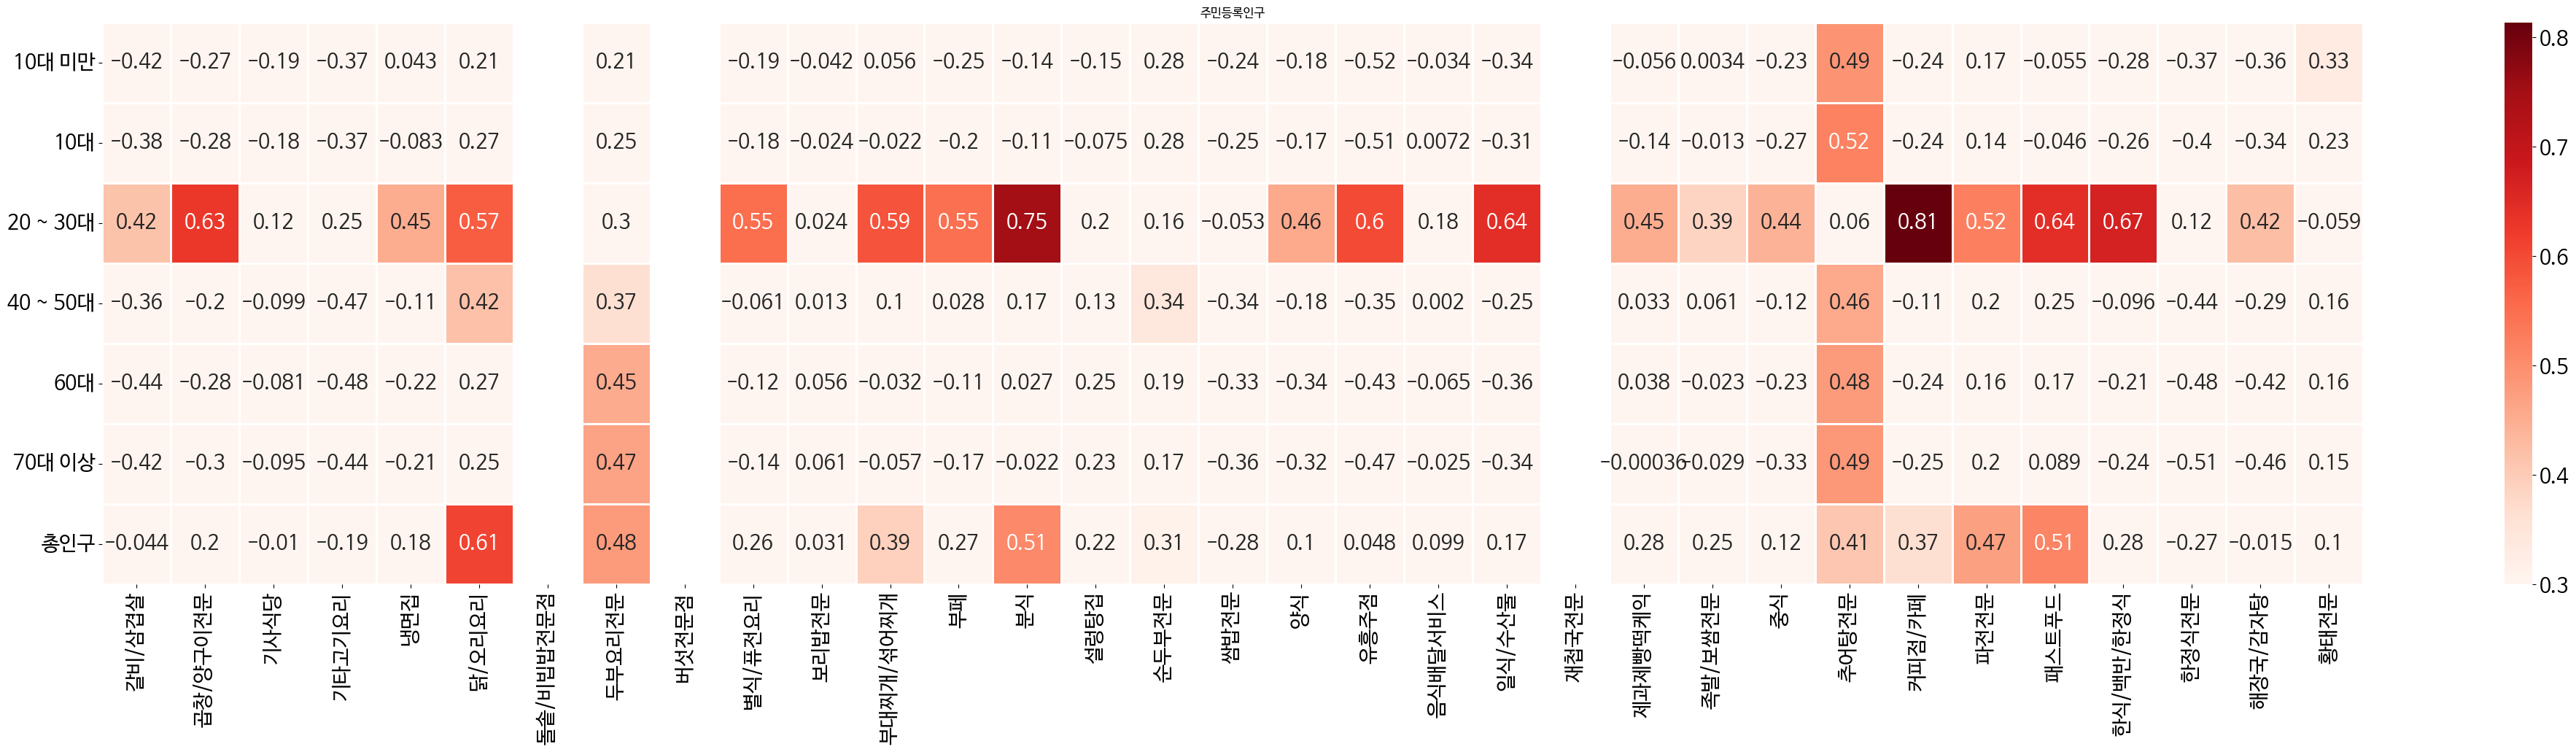

In [36]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,10))
sns.heatmap(population_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("주민등록인구")
plt.show()

In [37]:
result_population.groupby('업종')['변수'].count()

업종
갈비/삼겹살       6
곱창/양구이전문     1
기타고기요리       5
냉면집          1
닭/오리요리       3
두부요리전문       4
별식/퓨전요리      1
부대찌개/섞어찌개    2
부페           1
분식           2
순두부전문        2
쌈밥전문         3
양식           3
유흥주점         6
일식/수산물       5
제과제빵떡케익      1
족발/보쌈전문      1
중식           2
추어탕전문        6
커피점/카페       2
파전전문         2
패스트푸드        2
한식/백반/한정식    1
한정식전문        5
해장국/감자탕      5
황태전문         1
Name: 변수, dtype: int64

- 주민등록인구 데이터의 전체 변수 개수: **7개**
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **관악구**에서의 주민등록인구 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **g) 지하철**

In [38]:
### 필요한 데이터 추출

df_subway = pd.concat([df.iloc[:,0:35],df.iloc[:,70:]],axis = 1)
df_subway.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,역(전체),역(환승역)
0,관악구,보라매동,9,2,0,2,1,10,0,0,...,1,50,1,12,66,1,2,0,1,0
1,관악구,청림동,3,0,0,1,1,3,0,0,...,0,8,0,3,20,0,0,0,0,0
2,관악구,성현동,2,1,0,0,0,8,0,0,...,1,15,0,3,22,0,1,0,0,0
3,관악구,행운동,4,5,0,1,1,14,0,1,...,0,59,0,15,45,0,0,0,0,0
4,관악구,낙성대동,21,4,0,6,2,11,0,0,...,0,70,0,7,87,2,3,0,0,0


In [39]:
### 상관계수 파악

subway_corr = df_subway.corr().iloc[33:,:33]
subway_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
역(전체),0.198055,0.188684,0.789352,0.250087,-0.060351,0.410004,NaN,-0.021926,NaN,0.266780,...,-0.103984,0.022913,-0.048692,0.345642,0.240192,0.410278,0.261142,-0.116024,0.211538,0.031814
역(환승역),-0.037019,0.084921,1.000000,0.112556,-0.247717,0.107879,NaN,-0.125000,NaN,0.155394,...,-0.055793,0.069666,-0.148047,0.151182,-0.068465,0.334447,0.077264,-0.132288,-0.021926,-0.072548


In [40]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_subway = selection(subway_corr)
result_subway.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,기사식당,역(환승역),1.000000
1,기사식당,역(전체),0.789352
2,닭/오리요리,역(전체),0.410004
3,부대찌개/섞어찌개,역(전체),0.367437
4,부페,역(전체),0.527887
5,부페,역(환승역),0.376177
6,설렁탕집,역(환승역),0.547723
7,설렁탕집,역(전체),0.530425
8,유흥주점,역(전체),0.433220
9,유흥주점,역(환승역),0.368561


- 관악구의 경우 다른 행정구에 비해 환승역의 수가 많다.
    - 기사식당과 환승역 개수 간의 상관계수는 1로 매우 강한 양의 상관관계를 보인다.

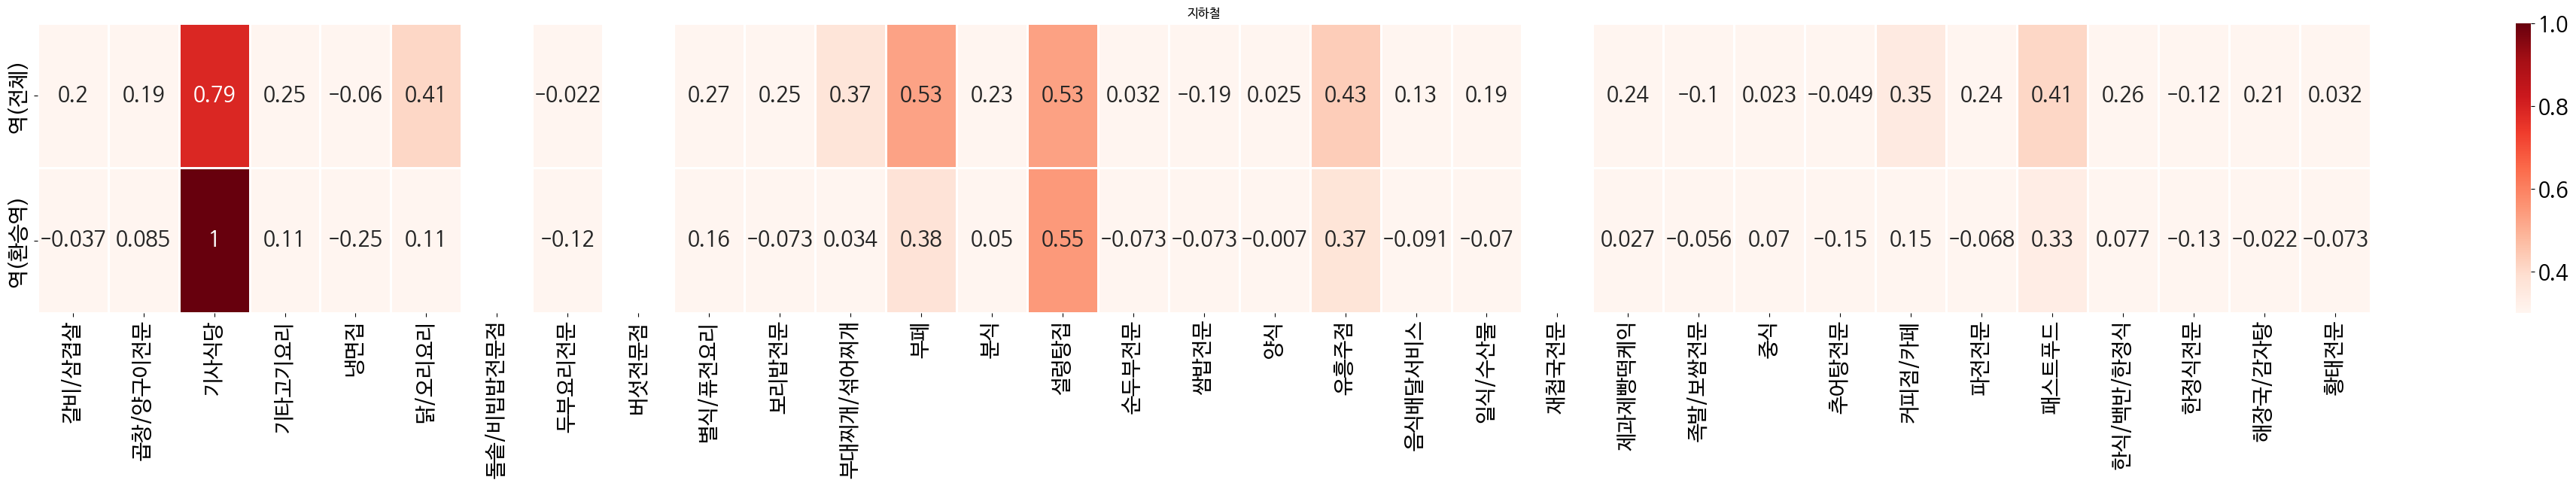

In [41]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(subway_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("지하철")
plt.show()

In [42]:
result_subway.groupby('업종')['변수'].count()

업종
기사식당         2
닭/오리요리       1
부대찌개/섞어찌개    1
부페           2
설렁탕집         2
유흥주점         2
커피점/카페       1
패스트푸드        2
Name: 변수, dtype: int64

- 지하철 데이터의 전체 변수 개수: **2개**
- 지하철 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 서울시 전체와 비교하였을 때 **관악구**에서의 지하철 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.